# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error


%matplotlib inline

In [2]:
# Read in the data set
ames_data = pd.read_csv('ames.csv')
ames_data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
# Clean and pre-process the data if neccessary
ames_data.isnull().sum()

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

In [4]:
# Select X variables
x = ames_data[['Gr_Liv_Area', 'Garage_Area']].values

# Select Y variales
y = ames_data['Sale_Price'].values.reshape(-1, 1)    

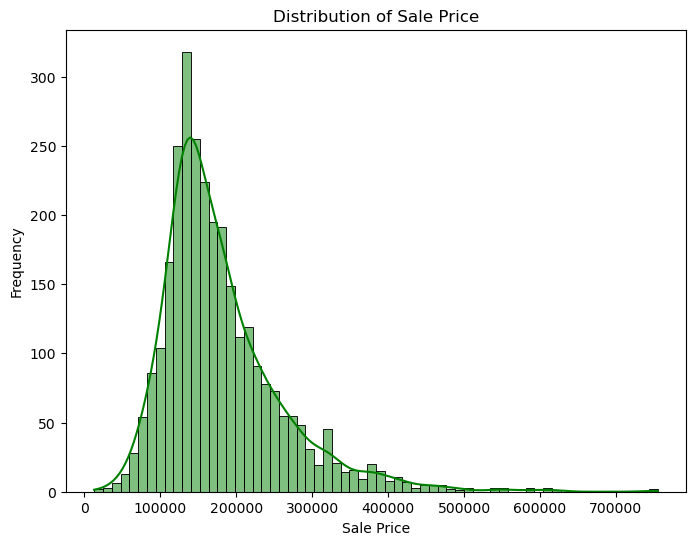

In [5]:
# Explore the data with visualisations such as histograms and correlation matrices

plt.figure(figsize=(8, 6)) # Set figure size before plotting

sns.histplot(data=ames_data, x='Sale_Price', kde=True, color='g')

plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

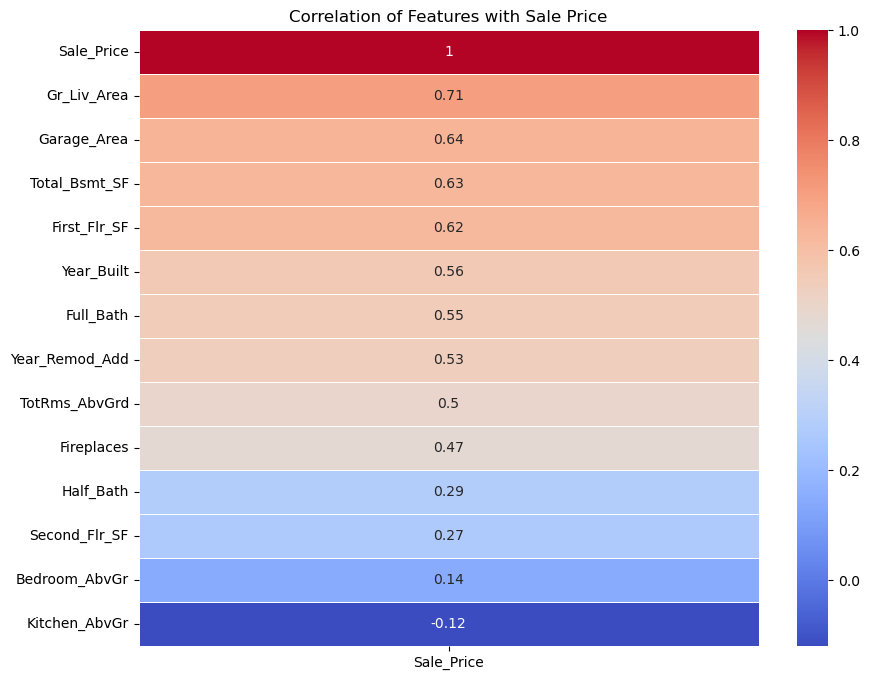

In [6]:
# Explore relationships between the independent and dependent variables
corr = ames_data.corr(numeric_only=True)

# Focus only on variables that correlate with Sale_Price
corr_target = corr[['Sale_Price']].sort_values(by='Sale_Price', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Sale Price')
plt.show()


In [7]:
# Create a training and test set with a 75:25 split ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.75,  random_state=23)

In [8]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test) 

In [9]:
# Generate predictions for the test set
y_pred = model.predict(x_test)

In [10]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred) # Mean Squared Error (MSE)

# Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 ): {r2:.4f}")


Mean Squared Error (MSE): 2428159468.38
Root Mean Squared Error (RMSE): 49276.36
Mean Absolute Error (MAE): 33082.28
R-squared (R2 ): 0.6094


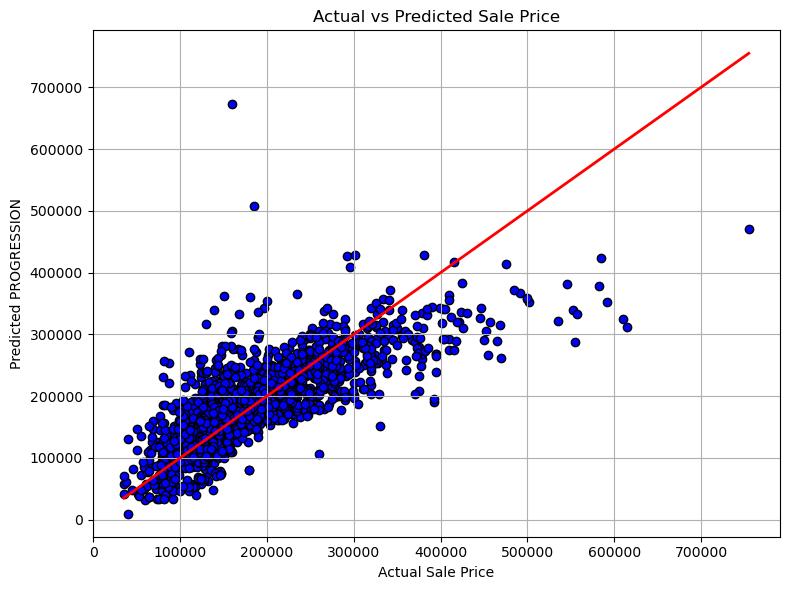

In [11]:
# Generate a plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='b', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted PROGRESSION')
plt.title('Actual vs Predicted Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-17922.22763322]
Coefficients: [[ 82.02605426 161.04148799]]


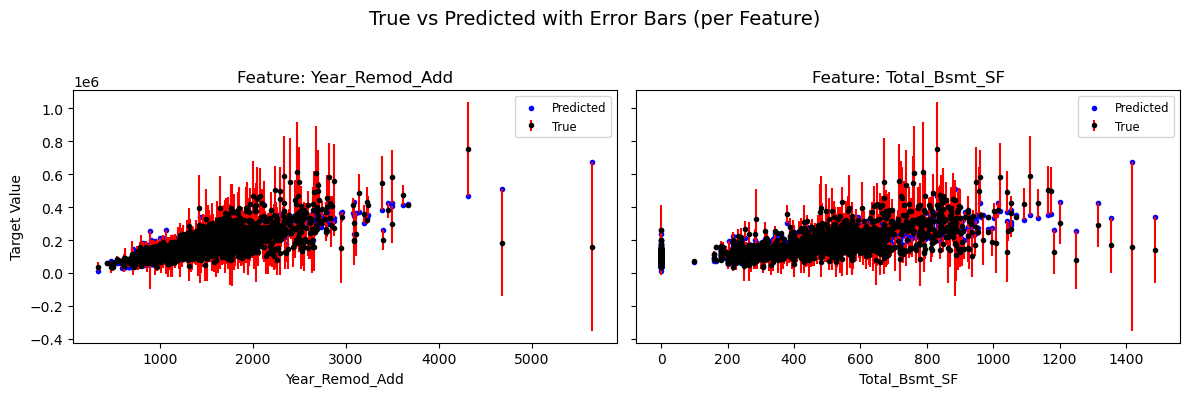

In [13]:
# Convert to NumPy if 
x_vals = x_test.values if hasattr(x_test, 'values') else x_test
y_vals = y_test.values if hasattr(y_test, 'values') else y_test
preds = predictions

# Compute absolute error for each prediction
error_bar_values = np.abs((y_vals - preds)[:, 0])

# Setup 2 subplots (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle("True vs Predicted with Error Bars (per Feature)", fontsize=14)

# Set Y label on the first subplot
ax[0].set_ylabel("Target Value")

# Loop through 2 features
for i in range(2):
    ax[i].errorbar(x_vals[:, i], y_vals[:, 0], yerr=error_bar_values,
                   fmt='.k', ecolor='red', label='True')
    ax[i].scatter(x_vals[:, i], preds[:, 0], c='blue', marker='.', label='Predicted')
    ax[i].set_xlabel(f"{ames_data.columns[i + 1]}")  # Adjust if needed
    ax[i].set_title(f"Feature: {ames_data.columns[i + 1]}")
    ax[i].legend(loc='best', fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Interpret coefficients in the context of the prediction:**

Gr_Liv_Area Coefficient = 82.03
For every additional 1 square foot of above-ground living area, the predicted house price increases by $82.03, assuming garage area remains constant.

Garage_Area Coefficient = 161.04
For every additional 1 square foot of garage area, the predicted house price increases by $161.04, assuming living area (Gr_Liv_Area) remains constant.

**Summarise findings**

1. Explanatory Data Analysis(EDA)
- SalesPrice is left skewed
- Strong positive correlation found between Gr_Liv_Area (Above Ground Living Area) and SalePrice, suggesting that larger homes tend to sell for more.
- Features like Garage_Area, Total_Basement_SF, and First_Fir_SF also showed moderate positive correlations.


2. Model Performance
Using a multiple linear regression model, the following performance metrics were observed

Mean Squared Error (MSE): 2,428,159,468.38 - Indicates average squared difference of about $24 billion between predicted and actual values.

Root Mean Squared Error (RMSE): 49,276.36 -  On average, the model predictions are off by $49,000.

Mean Absolute Error (MAE): 33082.28 - Shows typical prediction error of around $33,000.

R-squared: 0.6094 - The model explains 61% of the variation in house prices.

Notable observations:
- The model uses only two features. The remaining 39% of variation could be due to missing features or noise.